In [1]:
# import required libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
# create a custom dataset
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets

  def __len__(self):
    return self.data.shape[0]

  def __getitem__(self, idx):
    current_sample = self.data[idx, :]
    current_target = self.targets[idx]
    d = {}
    d["x"] = torch.tensor(current_sample, dtype=torch.float)
    d["y"] = torch.tensor(current_target, dtype=torch.long)
    return d

In [3]:
data, targets = make_classification(n_samples=1000)

train_x, test_x, train_y, test_y = train_test_split(data, targets, stratify=targets)

In [4]:
train_x.shape

(750, 20)

In [5]:
print(test_x.shape)

(250, 20)


In [6]:
train_data = CustomDataset(train_x, train_y)
test_data = CustomDataset(test_x, test_y)

In [7]:
batch_size = 4
num_workers = 2

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [8]:
model = lambda x, w, b: torch.matmul(x,W) + b

In [9]:
W = torch.randn(20, 1, requires_grad=True)
b = torch.randn(1, requires_grad = True)
lr = 0.001
num_epochs = 20

train_losses = []

for epochs in range(num_epochs):
  train_loss = 0.0
  counter = 0
  for data in train_loader:
    inputs = data["x"]
    labels = data["y"]

    outputs = model(inputs, W, b)
    loss = torch.mean((labels.view(-1) - outputs.view(-1))**2)
    train_loss += loss.item()
    loss.backward() 

    with torch.no_grad():
      W = W - lr * W.grad
      b = b - lr * b.grad
    
    W.requires_grad_(True)
    b.requires_grad_(True)

    counter += 1

  train_losses.append(train_loss)
  print("Epoch: {} ------> Training Loss: {:0.6f}".format(epochs+1, train_loss/counter))


Epoch: 1 ------> Training Loss: 22.026894
Epoch: 2 ------> Training Loss: 9.861369
Epoch: 3 ------> Training Loss: 4.800403
Epoch: 4 ------> Training Loss: 2.414897
Epoch: 5 ------> Training Loss: 1.253491
Epoch: 6 ------> Training Loss: 0.678995
Epoch: 7 ------> Training Loss: 0.391182
Epoch: 8 ------> Training Loss: 0.245301
Epoch: 9 ------> Training Loss: 0.170548
Epoch: 10 ------> Training Loss: 0.131851
Epoch: 11 ------> Training Loss: 0.111630
Epoch: 12 ------> Training Loss: 0.100971
Epoch: 13 ------> Training Loss: 0.095308
Epoch: 14 ------> Training Loss: 0.092278
Epoch: 15 ------> Training Loss: 0.090646
Epoch: 16 ------> Training Loss: 0.089762
Epoch: 17 ------> Training Loss: 0.089281
Epoch: 18 ------> Training Loss: 0.089017
Epoch: 19 ------> Training Loss: 0.088873
Epoch: 20 ------> Training Loss: 0.088793


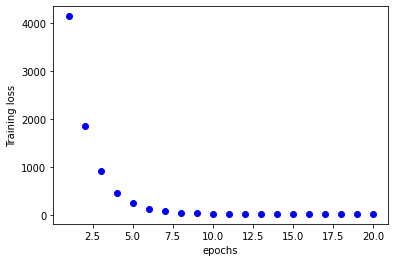

In [10]:
# plot the loss for each epochs
epochs = range(1, num_epochs+1)
plt.plot(epochs, train_losses, 'bo')
plt.xlabel("epochs")
plt.ylabel("Training loss")
plt.show()

In [11]:
predictions = []
targets = []
with torch.no_grad():
  for data in test_loader:
    inputs = data["x"]
    labels = data["y"]

    pred = model(inputs, W, b)
    targets.append(labels)
    predictions.append(pred)

In [12]:
auc_score = metrics.roc_auc_score(torch.cat(targets).view(-1), torch.cat(predictions).view(-1))
print(auc_score)

0.9791346646185355
